# Disease Prediction Using Six ML Algorithms. 
# Case Study of SARS-CoV-2 Symptoms Classification
>## Models used: Random forest, Xgboost, Logistic Regression, Naive Bayes, K-Nearest Neigbour, Principal Component Analysis (PCA) with Support Vector Machine and (SVM) classifier

### Introduction
Pneumonia caused by SARS-CoV-2 emerged in Wuhan, China in December 2019 and was officially named COVID-19 by the WHO on Feb 11, 2020. The disease presents with a range of symptoms, including fever, dry cough, and fatigue, and is highly contagious through respiratory droplets and direct contact. The Chinese government and scientific community have taken rapid action to identify and contain the epidemic. Machine learning algorithms are being used to diagnose and manage the spread of the virus, which is the focus of this paper. Research has provided critical information on the biology and pathogenesis of SARS-CoV-2, as well as epidemiology, clinical features, diagnosis, management, and drug and vaccine development.

### Data Description
The data set used for this machine learning process was source from [Kaggle covid-19 dataset](https://www.kaggle.com/datasets/mykeysid10/covid19-dataset-for-year-2020). However, the original source is found at [Israel Govt databases](https://data.gov.il/dataset/covid-19/resource/d337959a-020a-4ed3-84f7-fca182292308). 

The data set contained 5861480 rows and 10 columns. Columns in the set are:

test_date,cough,fever, sore_throat, shortness_of_breath, head_ache, corona_result, age_60_and_above, gender and test_indication. For this work, we shall be using all columns having symptoms and the the test_indication.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

### scikit learn imports  
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


In [2]:
### set defaults  
mpl.rcParams['agg.path.chunksize'] = 1000

# Set a general theme for plots
sns.set_theme(style="whitegrid", palette="pastel")

# Customize further if needed
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 16

Assigning the downloaded covid data to the variable dataframe

In [3]:
df = pd.read_csv('../datasets/covid_data_2020_2021.csv')

### Show dataframe sample 
df.sample(5)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
2728805,2020-12-28,0,0,0,0,0,Negative,No,male,Other
2590387,2021-01-02,0,0,0,0,0,Negative,No,male,Other
5289803,2020-07-21,0,0,0,0,0,Positive,No,male,Contact with confirmed
3780517,2020-11-05,0,0,0,0,0,Negative,No,female,Other
1066028,2021-07-26,0,0,0,0,0,Negative,No,female,Other


### Exploratory Data Analysis (EDA)

In [4]:
### show dataframe head 
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other
1,2021-10-11,0,0,0,0,0,Negative,Yes,male,Other
2,2021-10-11,0,0,0,0,0,Negative,No,female,Other
3,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other
4,2021-10-11,0,0,0,0,0,Negative,Yes,female,Other


In [5]:
### Reassign integers(0 & 1) in place of Negative and Positive strings in the corona_result column 
df['corona_result'] = df['corona_result'].map({'Negative': 0, 'Positive': 1})

### check that the changes have been implemented 
df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2021-10-11,0,0,0,0,0,0,Yes,female,Other
1,2021-10-11,0,0,0,0,0,0,Yes,male,Other
2,2021-10-11,0,0,0,0,0,0,No,female,Other
3,2021-10-11,0,0,0,0,0,0,Yes,female,Other
4,2021-10-11,0,0,0,0,0,0,Yes,female,Other
...,...,...,...,...,...,...,...,...,...,...
5861475,2020-03-20,1,1,0,0,0,0,No,female,Other
5861476,2020-03-20,0,0,0,0,0,0,No,male,Other
5861477,2020-03-20,0,0,0,0,0,0,No,female,Other
5861478,2020-03-20,0,0,0,0,0,0,No,male,Other


In [6]:
### check dataset properties 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5861480 entries, 0 to 5861479
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        int64 
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(6), object(4)
memory usage: 447.2+ MB


In [7]:
df['test_indication'].unique()

array(['Other', 'Contact with confirmed', 'Abroad'], dtype=object)

In [8]:
### check the number of null values  
df.isna().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

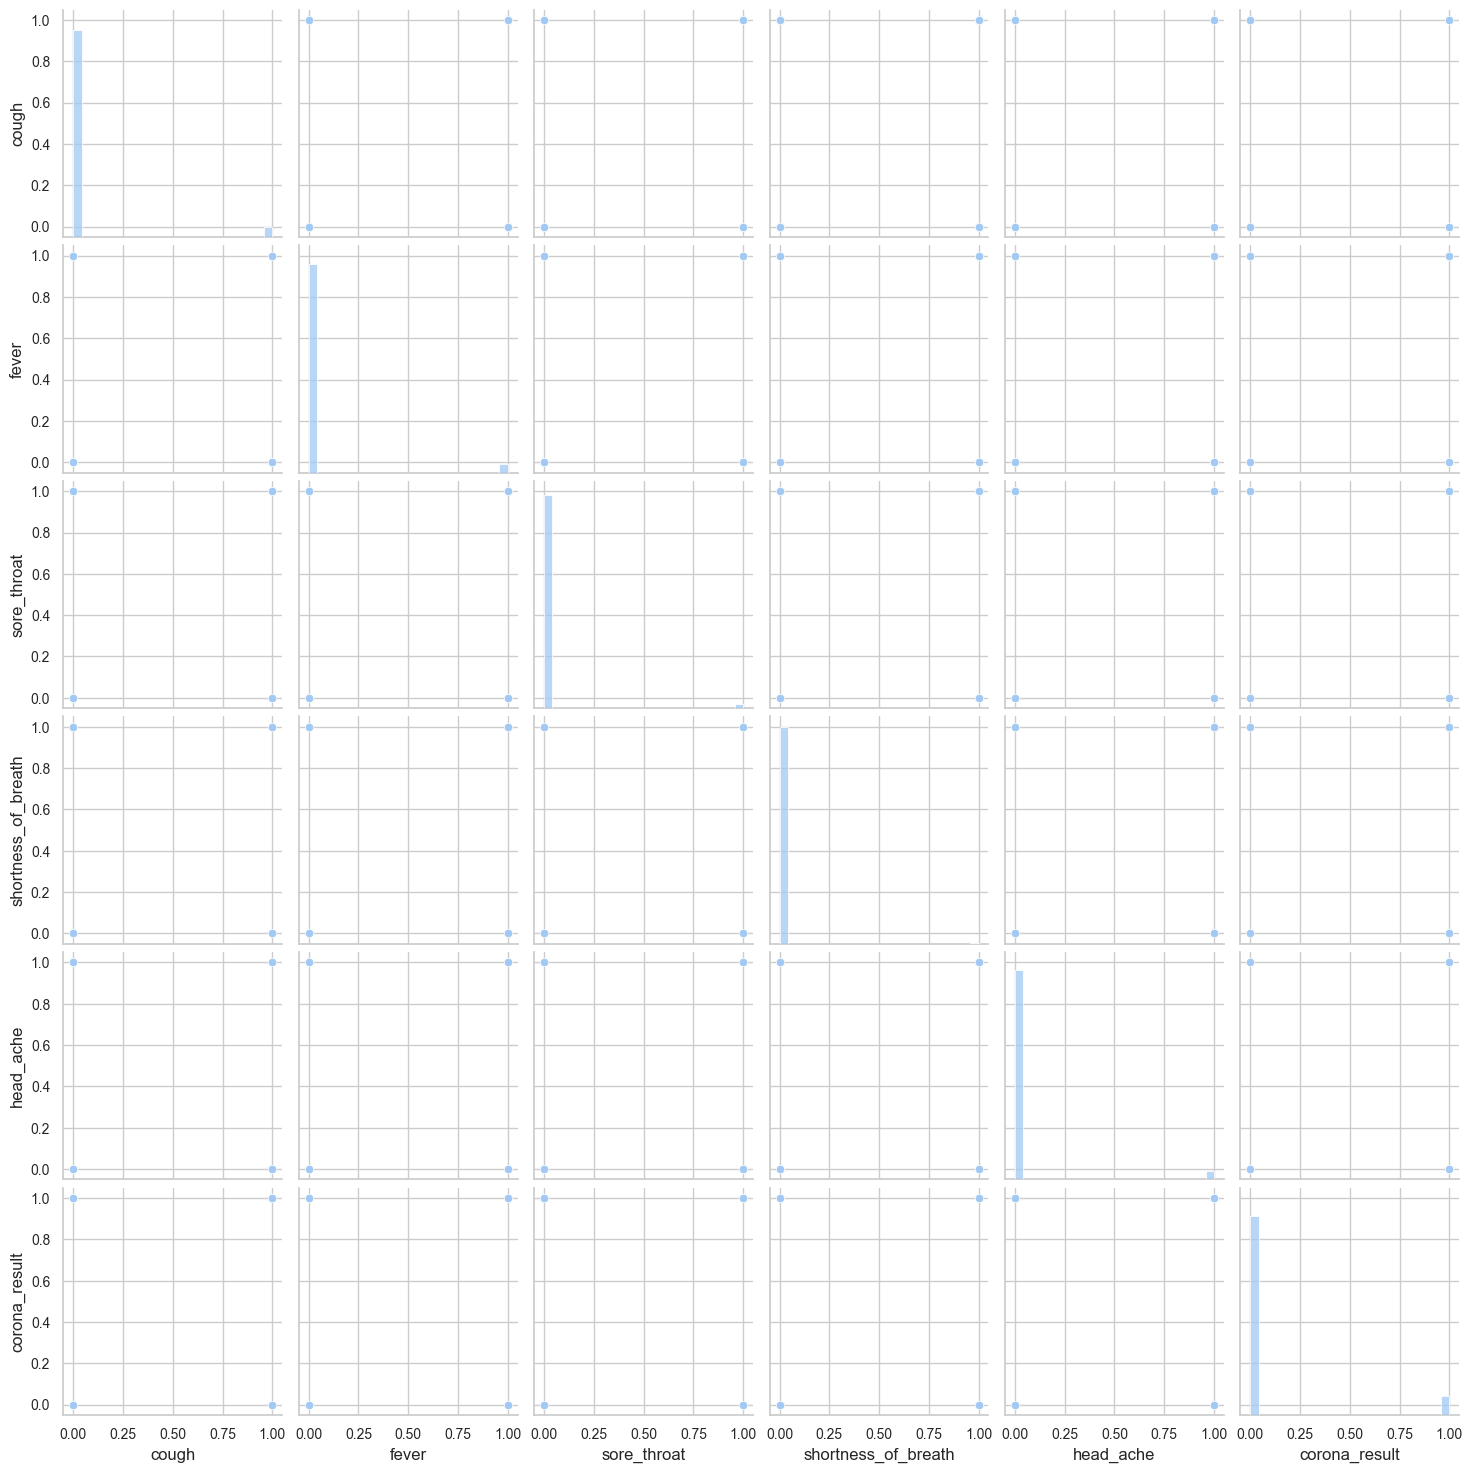

In [9]:
sns.pairplot(df)

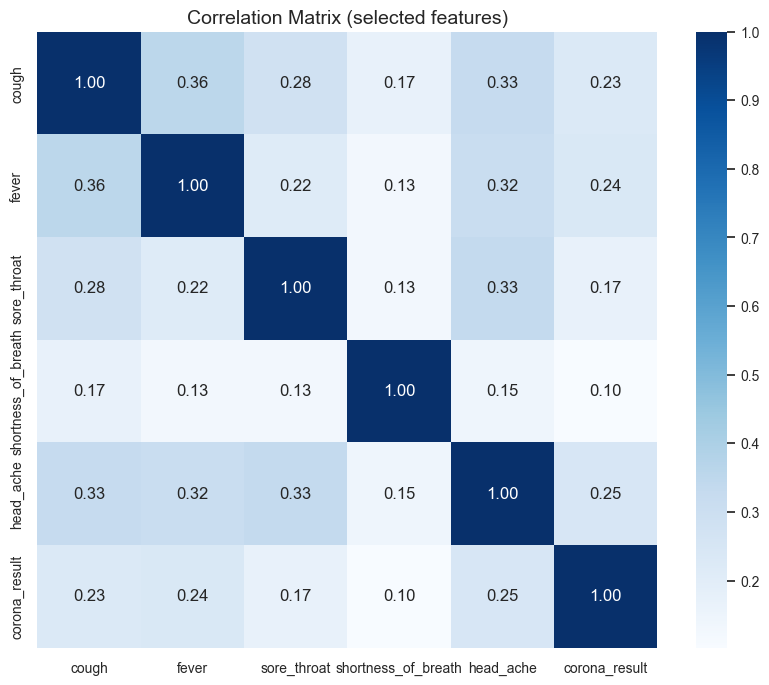

In [10]:
### Observation: Dataset is void of missing values  

### Plot correlation matrix (excluding specified columns)
columns_to_keep = ['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'corona_result']

# Modify the original dataframe to keep only the selected columns
df = df[columns_to_keep]

# Calculate correlation matrix
cor = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cor, annot=True , fmt='.2f', cmap='Blues')
plt.title('Correlation Matrix (selected features)')
plt.show()

Text(0.5, 1.0, 'Count of corona result in dataset')

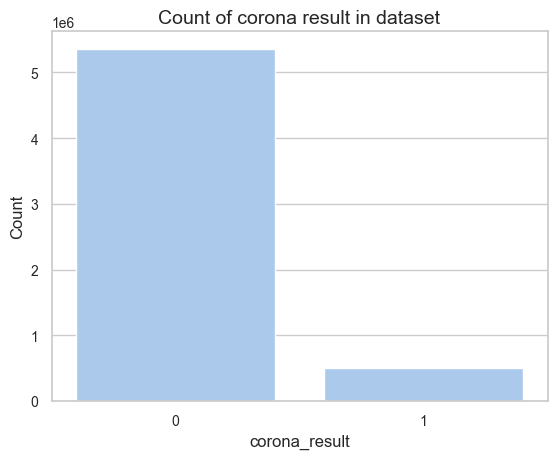

In [11]:
sns.countplot(data=df, x='corona_result',)
plt.ylabel('Count')
plt.title('Count of corona result in dataset')

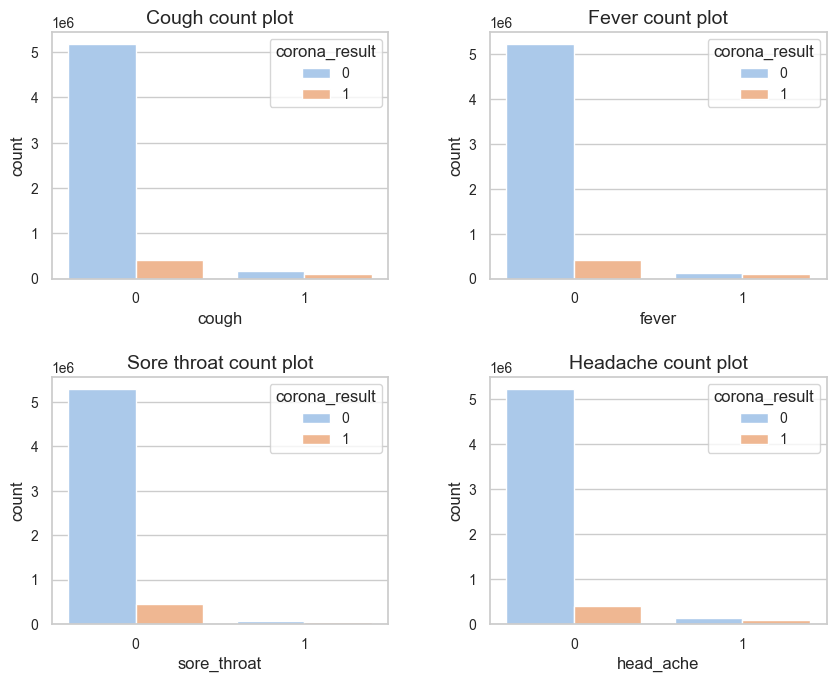

In [12]:
### create subplots to visualise the effect of direct symptoms to test result  
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

### set plots for all axes 
ax[0, 0].set_title('Cough count plot')
sns.countplot(data=df, x='cough', hue='corona_result', ax=ax[0, 0])


ax[0, 1].set_title('Fever count plot')
sns.countplot(data=df, x='fever', hue='corona_result', ax=ax[0, 1])


ax[1, 0].set_title('Sore throat count plot')
sns.countplot(data=df, x='sore_throat', hue='corona_result', ax=ax[1, 0])


ax[1, 1].set_title('Headache count plot')
sns.countplot(data=df, x='head_ache', hue='corona_result', ax=ax[1, 1])

### adjust vertical spacing for subplots
fig.subplots_adjust(top=0.85, wspace=0.3, hspace=0.4)

### show plot  
plt.show()

#### Observation: **General observation**
- Majority of cases are negative
- From sore throat case, the positive to negative ratio was higher than other symptoms, showing that soar throat was and important indicator of the infection

#### Data preparation
rest of comments here...

In [13]:
### Get target variable and independent variables 
### target 
y=df['corona_result']
### independent 
x=df.drop(['corona_result'], axis=1)

### check independent variables  
x.sample(8)


,cough,fever,sore_throat,shortness_of_breath,head_ache
3318556,0,0,0,0,0
3285588,0,0,0,0,0
121022,0,0,0,0,0
1562207,0,0,0,0,0
2459083,0,0,0,0,0
1696860,0,0,0,0,0
90110,1,1,0,0,0
3133568,0,0,0,0,0


In [14]:
 ### check target variable  
y.sample(8)

3846234    0
1144195    0
4623288    0
1462137    0
2642086    0
3172762    0
1768210    0
4157139    0
Name: corona_result, dtype: int64

In [15]:
### check disparity of negative and positive values in our target variable  
df['corona_result'].value_counts()

corona_result
0    5355807
1     505673
Name: count, dtype: int64

In [16]:
from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import RandomOverSampler

In [17]:
# under-sampling of the class with the majority count
undersample = RandomUnderSampler(sampling_strategy = {0: 500000, 1: 500000}, random_state = 33)
x_under, y_under = undersample.fit_resample(x, y)


In [18]:
y_under.value_counts()

corona_result
0    500000
1    500000
Name: count, dtype: int64

In [19]:
### Setting  Train:Test Ratio as 80:20

x_train, x_test, y_train, y_test = train_test_split(x_under, y_under, test_size=0.2, random_state=42)

print (x_train.shape, x_test.shape, y_train.shape, y_test.shape)
print('\n')
print (y_train.value_counts())
print('\n')
print (y_test.value_counts())

(800000, 5) (200000, 5) (800000,) (200000,)


corona_result
0    400013
1    399987
Name: count, dtype: int64


corona_result
1    100013
0     99987
Name: count, dtype: int64


In [20]:
x_train

,cough,fever,sore_throat,shortness_of_breath,head_ache
4217341,0,0,0,0,0
2063151,0,0,0,0,0
4588643,0,0,0,0,1
5323051,0,0,0,0,0
4217575,0,0,1,0,0
...,...,...,...,...,...
4311647,0,0,0,0,0
2860181,0,0,0,0,0
455462,0,0,0,0,0
3966355,0,0,0,0,0


In [21]:
x_test

,cough,fever,sore_throat,shortness_of_breath,head_ache
3568261,0,0,0,0,0
4464133,0,0,0,0,0
3097723,1,0,1,0,1
1520448,0,0,0,0,0
4405055,0,0,0,0,0
...,...,...,...,...,...
1140758,0,0,0,0,0
4158708,0,1,0,0,0
5184453,0,0,0,0,0
1961647,1,0,0,0,1


#### Using Random forest 

In [22]:
# Initializing the random forest classifier 
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
# Fit the random forest classifier
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [23]:
### Make predictions on test data  

# Make predictions on test data
y_pred = rfc.predict(x_test)

accuracy1 = accuracy_score(y_test, y_pred)
precision1 = precision_score(y_test, y_pred)
recall1 = recall_score(y_test, y_pred)
f1_score1 = f1_score(y_test, y_pred)

print('Random Forest Classifier\n--------------------')
print(f'Accuracy: {round(accuracy1 * 100, 2)}%')
print(f'Precision: {round(precision1 * 100, 2)}%')
print(f'Recall: {round(recall1 * 100, 2)}%')
print(f'F1-score: {round(f1_score1 * 100, 2)}%')

Random Forest Classifier
--------------------
Accuracy: 68.36%
Precision: 87.82%
Recall: 42.64%
F1-score: 57.41%


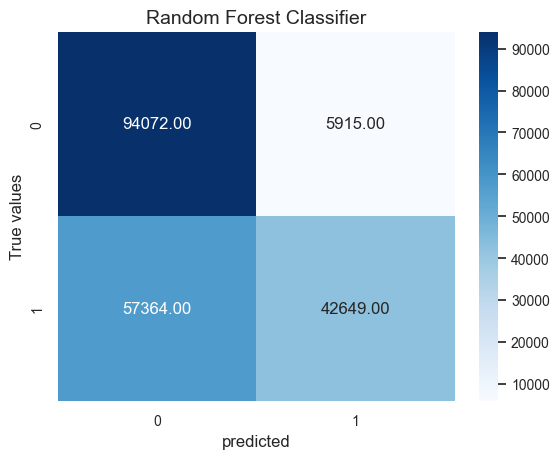

In [24]:
### Plot the confusion matrix 
matx = confusion_matrix(y_test, y_pred)
sns.heatmap(matx, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('True values')
plt.title('Random Forest Classifier')
plt.show()

#### Observation: A lot of positive cases were predicted as negative
...

In [25]:
### Hyper parameter tuning  
from sklearn.model_selection import GridSearchCV

# model_grid_params = {
#     'n_estimators': list(range(90, 110)),
#     'max_depth': list(range(1, 10)),
#     'random_state': list(range(40,60))
# }
# 
# grid_search = GridSearchCV(rfc, model_grid_params, cv = 5)
# grid_search.fit(x_train, y_train)
# 
# # Output griod search result
# grid_search.best_params_

In [26]:
# Create an XGBoost DMatrix for the training data
import xgboost as xgb

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

In [27]:
#Defining the hyperparameters for the XGBoost model

params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'multi:softmax',
    'num_class': 3}

#Training the Model
model = xgb.train(params, dtrain, num_boost_round=10)

In [28]:
# Making predictions on the testing set

xgy_pred = model.predict(dtest)
accuracy2 = accuracy_score(y_test, xgy_pred)

from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(y_test, xgy_pred)
precision2 = precision_score(y_test, xgy_pred)
recall2 = recall_score(y_test, xgy_pred)
f1_score2 = f1_score(y_test, xgy_pred)

print('XG Boost Classifier\n--------------------')
print(f'Accuracy: {round(accuracy2 * 100, 2)}')
print(f'Precision: {round(precision2 * 100, 2)}')
print(f'Recall: {round(recall2 * 100, 2)}')
print(f'f1_score: {round(f1_score2 * 10, 2)}')



XG Boost Classifier
--------------------
Accuracy: 68.15
Precision: 87.78
Recall: 42.17
f1_score: 5.7


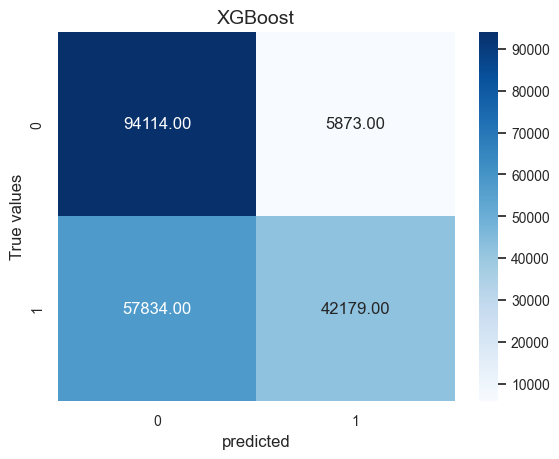

In [29]:
matx = confusion_matrix(y_test, xgy_pred)
sns.heatmap(matx, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('True values')
plt.title('XGBoost')
plt.show()

USING LOGISTICS REGRESSION MODEL

In [30]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
lry_pred=logreg.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy3 = accuracy_score(y_test, lry_pred)
precision3 = precision_score(y_test, lry_pred)
recall3 = recall_score(y_test, lry_pred)
f1_score3 = f1_score(y_test, lry_pred)



In [31]:
print('Logistics Regression Classifer\n--------------------')
print(f'Accuracy: {round(accuracy3 * 100, 2)}')
print(f'Precision: {round(precision3 * 100, 2)}')
print(f'Recall: {round(recall3 * 100, 2)}')
print(f'f1_score: {round(f1_score3 * 10, 2)}')

Logistics Regression Classifer
--------------------
Accuracy: 68.36
Precision: 87.82
Recall: 42.64
f1_score: 5.74


Ploting confusion matrix for Logistic Regression

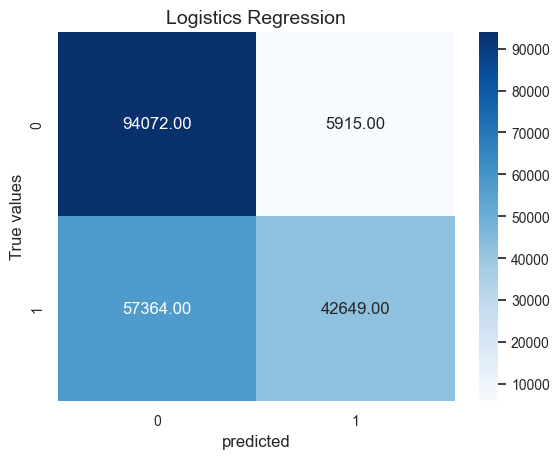

In [32]:
matx = confusion_matrix(y_test, lry_pred)
sns.heatmap(matx, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('True values')
plt.title('Logistics Regression')
plt.show()

In [33]:
### OBSERVATION: A lot of cases were predicted as negative

In [34]:
### USING THE NAIVE BAYES CLASSIFIER MODEL

In [35]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier on the training data
gnb.fit(x_train, y_train)

# Make predictions on the testing data
gnb_y_pred = gnb.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score
accuracy4 = accuracy_score(y_test, gnb_y_pred)
precision4 = precision_score(y_test, gnb_y_pred)
recall4 = recall_score(y_test, gnb_y_pred)
f1_score4 = f1_score(y_test, gnb_y_pred)

print('Logistics Regression Classifer\n--------------------')
print(f'Accuracy: {round(accuracy4 * 100, 2)}')
print(f'Precision: {round(precision4 * 100, 2)}')
print(f'Recall: {round(recall4 * 100, 2)}')
print(f'f1_score: {round(f1_score4 * 10, 2)}')

Logistics Regression Classifer
--------------------
Accuracy: 68.36
Precision: 87.82
Recall: 42.64
f1_score: 5.74


In [37]:
###Plotting confusion matrix for Naive Bayes

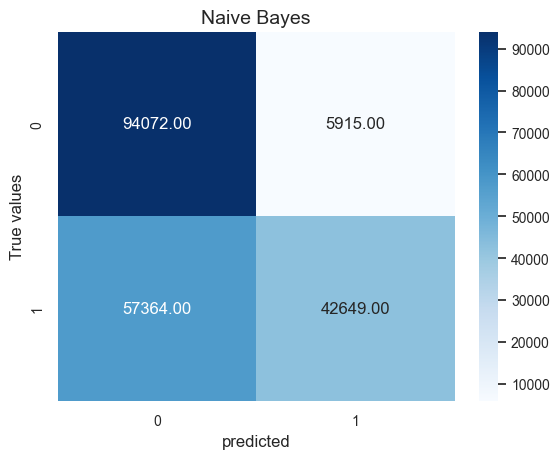

In [38]:
matx = confusion_matrix(y_test, gnb_y_pred)
sns.heatmap(matx, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('True values')
plt.title('Naive Bayes')
plt.show()

In [39]:
###Observation

###This model predicted more positive cases correctly as compared to the XG Boost Model
###This model predicted more positive cases wrongly than it did for correctly predicting positive cases.

In [40]:
#### USING THE K-NEAREST NEIGBOUR CLASSIFIER MODEL

In [41]:

knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier on the training data
knn.fit(x_train, y_train)

# Make predictions on the testing data
knn_y_pred = knn.predict(x_test)

accuracy_knn = accuracy_score(y_test, knn_y_pred)
precision_knn = precision_score(y_test, knn_y_pred, average='weighted')
recall_knn = recall_score(y_test, knn_y_pred, average='weighted')
f1_knn = f1_score(y_test, knn_y_pred, average='weighted')




K-Nearest Neighbors Classifier
--------------------
Accuracy: 47.04
Precision: 29.76
Recall: 47.04
f1_score: 32.67


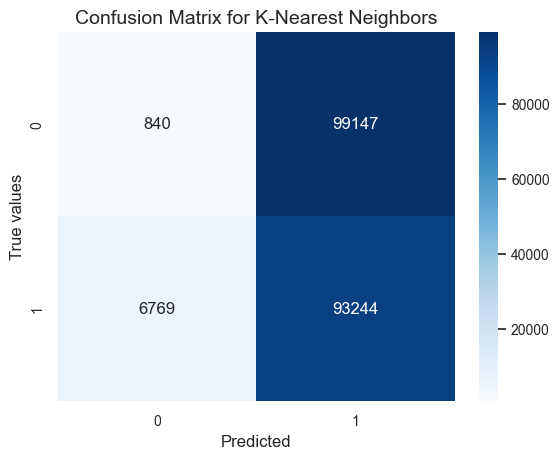

In [42]:
print('K-Nearest Neighbors Classifier\n--------------------')
print(f'Accuracy: {round(accuracy_knn * 100, 2)}')
print(f'Precision: {round(precision_knn * 100, 2)}')
print(f'Recall: {round(recall_knn * 100, 2)}')
print(f'f1_score: {round(f1_knn * 100, 2)}')

matx_knn = confusion_matrix(y_test, knn_y_pred)
sns.heatmap(matx_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True values')
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.show()

In [43]:
### USING PCA WITH SUPPORT VECTOR MACHINE (SVM) CLASSIFIER MODEL


In [ ]:


pca = PCA(n_components=2)  # Reduce the dimensions to 2 for visualization
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

svm_model = SVC(kernel='linear')  # Use a linear kernel for simplicity

# Train the classifier on the PCA-transformed training data
svm_model.fit(x_train_pca, y_train)

# Make predictions on the PCA-transformed testing data
svm_y_pred_pca = svm_model.predict(x_test_pca)

accuracy_svm_pca = accuracy_score(y_test, svm_y_pred_pca)
precision_svm_pca = precision_score(y_test, svm_y_pred_pca, average='weighted')
recall_svm_pca = recall_score(y_test, svm_y_pred_pca, average='weighted')
f1_svm_pca = f1_score(y_test, svm_y_pred_pca, average='weighted')

print('Support Vector Machine with PCA\n--------------------')
print(f'Accuracy: {round(accuracy_svm_pca * 100, 2)}')
print(f'Precision: {round(precision_svm_pca * 100, 2)}')
print(f'Recall: {round(recall_svm_pca * 100, 2)}')
print(f'f1_score: {round(f1_svm_pca * 100, 2)}')



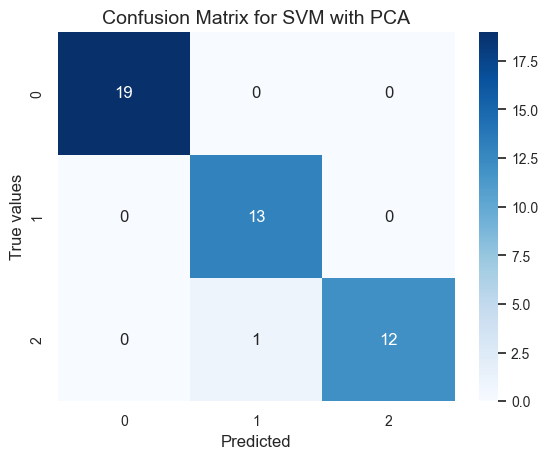

In [593]:
# CONFUSION MATRIX FOR SUPPORT VECTOR MACHINE WITH PCA
matx_svm_pca = confusion_matrix(y_test, svm_y_pred_pca)
sns.heatmap(matx_svm_pca, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True values')
plt.title('Confusion Matrix for SVM with PCA')
plt.show()


In [594]:
# Print and compare all 6 Accuracies, Recalls, Precisions and f1 scores...
models = ['Random Forest Model', 'XGBoost Model', 'Logistics Regression Model', 'Naive Bayes Model', 'K-Nearest Neighbors Classifier', 'Support Vector Machine with PCA']
accuracies = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy_knn, accuracy_svm_pca]
recalls = [recall1, recall2, recall3, recall4, recall_knn, recall_svm_pca]
precisions = [precision1, precision2, precision3, precision4, precision_knn, precision_svm_pca]
f1_scores = [f1_score1, f1_score2, f1_score3, f1_score4, f1_knn, f1_svm_pca]

for i in range(0, 6):
    print(f'{models[i]} Metrics:\n----------------------')
    print(f'Accuracy: {round(accuracies[i] * 100, 2)}%')
    print(f'Recall: {round(recalls[i] * 100, 2)}%')
    print(f'Precision: {round(precisions[i] * 100, 2)}%')
    print(f'F1 score: {round(f1_scores[i] * 100, 2)}%\n\n')

Random Forest Model Metrics:
----------------------
Accuracy: 68.36%
Recall: 42.64%
Precision: 87.82%
F1 score: 57.41%


XGBoost Model Metrics:
----------------------
Accuracy: 68.15%
Recall: 42.17%
Precision: 87.78%
F1 score: 56.97%


Logistics Regression Model Metrics:
----------------------
Accuracy: 68.36%
Recall: 42.64%
Precision: 87.82%
F1 score: 57.41%


Naive Bayes Model Metrics:
----------------------
Accuracy: 68.36%
Recall: 42.64%
Precision: 87.82%
F1 score: 57.41%


K-Nearest Neighbors Classifier Metrics:
----------------------
Accuracy: 47.04%
Recall: 47.04%
Precision: 29.76%
F1 score: 32.67%


Support Vector Machine with PCA Metrics:
----------------------
Accuracy: 97.78%
Recall: 97.78%
Precision: 97.94%
F1 score: 97.77%


